

> # MARKET SEGMENT ANALYSIS: choosing optimal segment for ELECTRIC VEHICLE market



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
import numpy as np


# Getting overview of ALL vehicles Registered in India (EV's non EV's)

In [ ]:
vehicle_df = pd.read_csv('/content/drive/MyDrive/csv files/Vehicle Class - All.csv')
vehicle_df.head(3)

Vehicle Class Total Registration
0  FOUR WHEELER (INVALID CARRIAGE)             21,346
1              HEAVY GOODS VEHICLE          58,70,865
2              HEAVY MOTOR VEHICLE           1,02,965

In [ ]:
vehicle_df.dtypes

Vehicle Class         object
Total Registration    object
dtype: object

In [ ]:
vehicle_df['Total Registration'] = vehicle_df['Total Registration'].str.replace(',','')
vehicle_df.head(3)

Vehicle Class Total Registration
0  FOUR WHEELER (INVALID CARRIAGE)              21346
1              HEAVY GOODS VEHICLE            5870865
2              HEAVY MOTOR VEHICLE             102965

In [ ]:
vehicle_df['Total Registration'] = vehicle_df['Total Registration'].astype(int)
vehicle_df.dtypes

Vehicle Class         object
Total Registration     int64
dtype: object

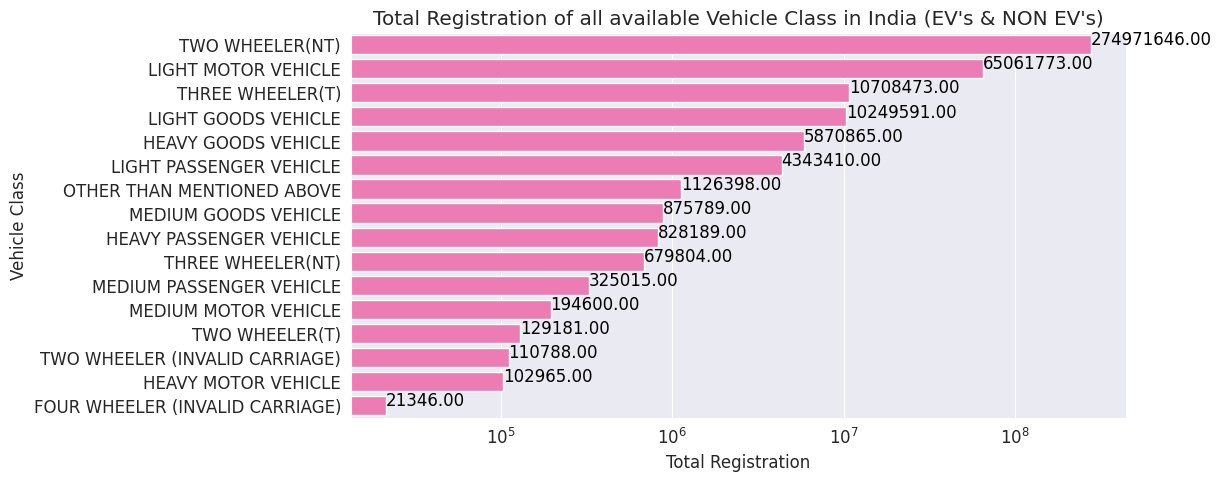

In [ ]:
vehicle_df = vehicle_df.sort_values(by='Total Registration', ascending=False)
barplot = sns.barplot(x = 'Total Registration', y ='Vehicle Class',data=vehicle_df, color='#FF69B4')
#  large disparity between the values is causing plot to have a skewed visual representation to address that
plt.xscale('log')  # logarithmic scale for the x-axis
plt.title("Total Registration of all available Vehicle Class in India (EV's & NON EV's)")
for index, value in enumerate(vehicle_df['Total Registration']):
    barplot.text(value, index, f'{value:.2f}', color='black', ha="left")
plt.show()

As can be seen from the bar plot, **Two-wheelers (NT)** have the **highest** number of Registration followed by **Light Motor Vehicle**, **Three Wheeler(T)** and so on. In the category of four-wheelers, LIGHT MOTOR VEHICLES (most of which are cars), MEDIUM MOTOR VEHICLES, MEDIUM PASSENGER VEHICLES, and LIGHT PASSENGER VEHICLES (cars) have around 19% of the market share. (They also include small trucks, vans, and passenger vehicles).
<br>Note: Two-wheelers (NT) - Non Transport: personal motorcycles and scooters<br>Two-wheelers (T)- used for delivery services, transportation of goods, or other commercial purposes.

In [ ]:
possibily_cars = ['LIGHT MOTOR VEHICLE', 'MEDIUM MOTOR VEHICLE', 'MEDIUM PASSENGER VEHICLE', 'LIGHT PASSENGER VEHICLE']
possibily_cars_total = vehicle_df[vehicle_df['Vehicle Class'].isin(possibily_cars)]['Total Registration'].sum()
print(f'Total registrations for 4 wheelers that include cars:  {possibily_cars_total}')

Total registrations for 4 wheelers that include cars:  69924798


In [ ]:
total_registration = vehicle_df['Total Registration'].sum()
percentage_possibily_cars = (possibily_cars_total/total_registration)*100
print(f'Percentage of cars/similar to car: {percentage_possibily_cars:.2f}%')

Percentage of cars/similar to car: 18.62%


# Getting Overview of Electric Vehicle Registration

In [ ]:
EV_sales = pd.read_excel('/content/drive/MyDrive/csv files/Ev Sales-2,3,4 weeler (Kaggle).xlsx')
EV_sales.head()

YEAR  2 W   3 W  4 W  BUS  TOTAL
0 2017-04-01   96  4748  198    0   5042
1 2017-05-01   91  6720  215    2   7028
2 2017-06-01  137  7178  149    1   7465
3 2017-07-01  116  8775  120    0   9011
4 2017-08-01   99  8905  137    0   9141

In [ ]:
EV_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB


In [ ]:
EV_sales.isna().sum().sum()

0

In [ ]:
EV_sales['year_only'] = EV_sales['YEAR'].dt.year
EV_sales.head(2)

YEAR  2 W   3 W  4 W  BUS  TOTAL  year_only
0 2017-04-01   96  4748  198    0   5042       2017
1 2017-05-01   91  6720  215    2   7028       2017

In [ ]:
# Group by 'YEAR' and sum the columns
grouped = EV_sales.groupby('year_only')[['2 W', '3 W', '4 W', 'BUS']].sum().reset_index()
grouped

year_only     2 W     3 W    4 W   BUS
0       2017    1211   69307   1591    14
1       2018   17062  110375   2500   680
2       2019   30389  133489   1749  1093
3       2020   29112   90361   4323    88
4       2021  156182  147180  14142  1180
5       2022  630725  350129  38744  2383
6       2023  388785  198159  31121   653

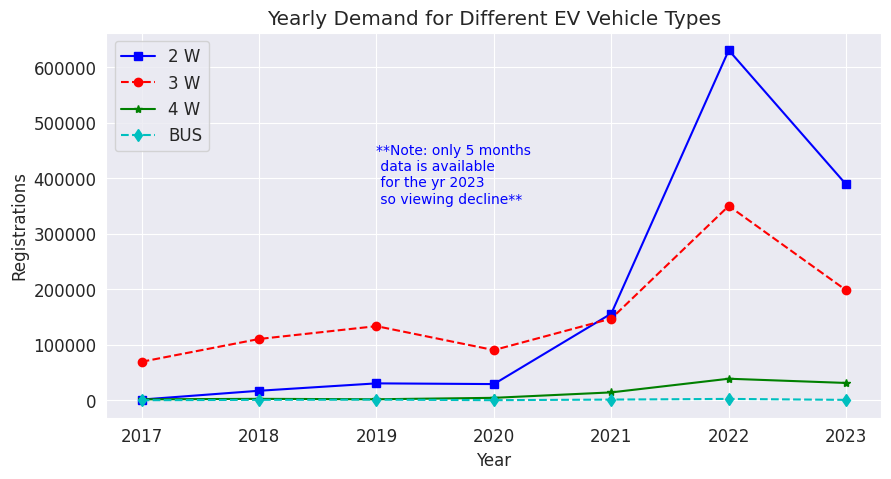

In [ ]:
# Yearly demand plot
plt.plot('year_only', '2 W', data=grouped, marker='s', linestyle='-', color='b', label='2 W')
plt.plot('year_only', '3 W', data=grouped, marker='o', linestyle='--', color='r', label='3 W')
plt.plot('year_only', '4 W', data=grouped, marker='*', linestyle='-', color='g', label='4 W')
plt.plot('year_only', 'BUS', data=grouped, marker='d', linestyle='--', color='c', label='BUS')

plt.xlabel('Year')
plt.ylabel('Registrations')
plt.title('Yearly Demand for Different EV Vehicle Types')
plt.legend()
plt.grid(True)

# Add a note
plt.text(x=2019, y=max(grouped['3 W']), s='**Note: only 5 months\n data is available\n for the yr 2023\n so viewing decline** ',
         fontsize=10, color='blue', verticalalignment='bottom')

plt.show()


Electric **two-wheelers** started seeing a **rising demand** since **2020**, and this trend has been increasing. We observe a drop in demand for the year 2023, likely due to the unavailability of data for the last few months of the year. Electric **three-wheelers** have had the highest registration numbers compared to all other electric vehicles since **2017**. It can be said that they were the **only ones with a significant market presence** according to the data. Electric **four-wheeler**s started seeing registrations since **2020** and have been **growing consistently** since then. Electric buses have the least number of registrations.


> We can conclude that businesses investing in 2-wheelers, 3-wheelers, and 4-wheelers (not including bus) can expect a very good return on investment. 2-wheelers have the highest demand, followed by 3-wheelers and 4-wheelers. All of these segments have seen growing demand in recent years.2W can be a potential segement.





### Viewing a monthly trend for 2 w and 4 w. (for yr 2020-2022 as these are the yrs when India started focusing on EV's)

In [ ]:
# Extract month from the 'YEAR' column
EV_sales['month_only'] = EV_sales['YEAR'].dt.month

# Group by both year and month and aggregate sales for '4 W' and '2 W'
monthly_sales = EV_sales.groupby(['year_only', 'month_only'])['4 W'].sum().reset_index()

# Create a pivot table for easier visualization
monthly_sales_pivot = monthly_sales.pivot(index='month_only', columns='year_only', values='4 W')
monthly_sales_pivot

year_only    2017   2018   2019   2020    2021    2022    2023
month_only                                                    
1             NaN  210.0   86.0  389.0   657.0  1587.0  3490.0
2             NaN  258.0  230.0  496.0   627.0  2474.0  4850.0
3             NaN  183.0  242.0  428.0   907.0  3770.0  8852.0
4           198.0  214.0  124.0    3.0  1080.0  2310.0  6193.0
5           215.0  262.0   63.0   84.0   262.0  3007.0  7736.0
6           149.0  288.0   60.0  295.0  1041.0  3280.0     NaN
7           120.0  278.0  117.0  359.0  1260.0  3454.0     NaN
8           137.0  198.0  108.0  371.0  1202.0  3417.0     NaN
9           193.0  172.0  180.0  340.0  1361.0  3589.0     NaN
10          214.0   90.0  195.0  462.0  1419.0  3950.0     NaN
11          186.0  193.0  222.0  570.0  1681.0  4027.0     NaN
12          179.0  154.0  122.0  526.0  2645.0  3879.0     NaN

In [ ]:
monthly_sales_pivot.columns

Index([2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int32', name='year_only')

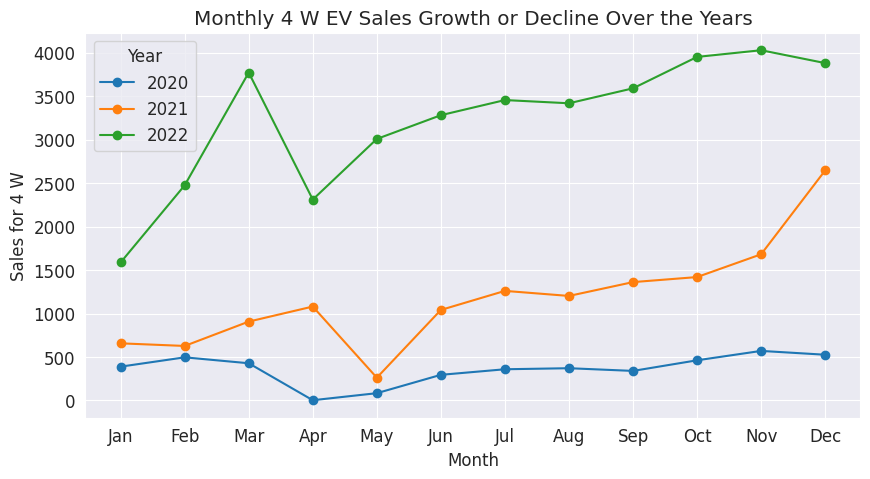

In [ ]:
monthly_sales_pivot[[2020,2021,2022]].plot(kind='line', marker='o')
# Customize the plot
plt.title('Monthly 4 W EV Sales Growth or Decline Over the Years')
plt.xlabel('Month')
plt.ylabel('Sales for 4 W')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()



> For 4W above line plot shows MAY to DEC is a sale season.



In [ ]:
monthly_sales.columns

Index(['YEAR', 'month_only', '2 W'], dtype='object')

In [ ]:
EV_sales.columns


Index(['YEAR', '2 W', '3 W', '4 W', 'BUS', 'TOTAL', 'year_only',
       'monthly_only', 'month_only'],
      dtype='object')

In [ ]:
# List of years to drop
years_to_drop = [2017, 2018, 2019, 2023]

# Drop rows where 'year_only' is in the years_to_drop list
EV_sales = EV_sales[~EV_sales['year_only'].isin(years_to_drop)]
x =EV_sales.groupby(['year_only', 'month_only'])['2 W'].sum().reset_index()
monthly_sales_pivot = x.pivot(index='month_only', columns='year_only', values='2 W')
monthly_sales_pivot

year_only   2020   2021   2022
month_only                    
1           2941   5319  30121
2           2353   6581  35708
3           2883  11963  54402
4             85   5694  53258
5            558   1243  42417
6           1511   4671  44372
7           1488  14671  46606
8           2115  16046  52196
9           3089  18032  53210
10          2951  20812  77137
11          4190  24528  76700
12          4948  26622  64598

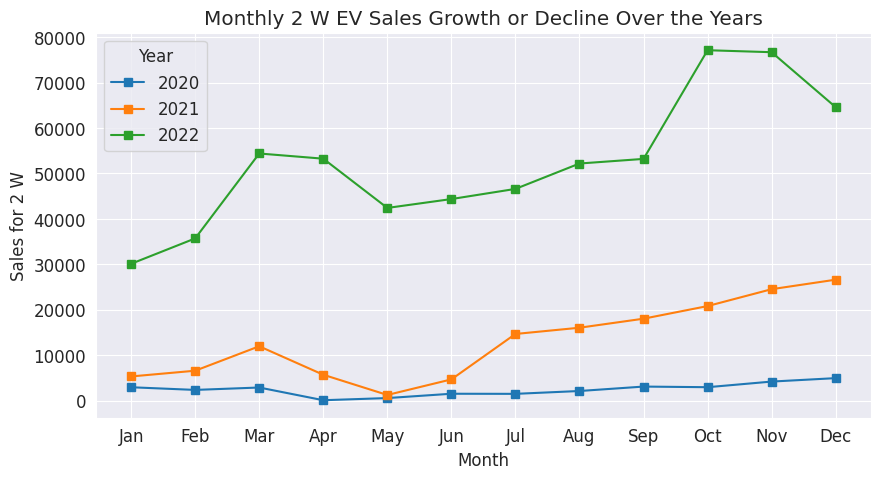

In [ ]:
monthly_sales_pivot.plot(kind='line', marker='s')
# Customize the plot
plt.title('Monthly 2 W EV Sales Growth or Decline Over the Years')
plt.xlabel('Month')
plt.ylabel('Sales for 2 W')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()



> From the above linplot we are unable to get perfect seasonal trend.



# Analyzing EV Category and Extracting potential market segment.


In [ ]:
ev_sales_df = pd.read_csv('/content/drive/MyDrive/csv files/ev_cat_01-24 (1).csv')
ev_sales_df.head()

Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
0         0                                0                    0   
1  01/01/01                                0                    1   
2  01/01/02                                0                    2   
3  01/01/03                                0                    1   
4  01/01/04                                0                    2   

   HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
0                    0                        0                    0   
1                    0                        0                    9   
2                    1                        0                  266   
3                    2                        0                   35   
4                    0                        1                   14   

   LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  MEDIUM GOODS VEHICLE  \
0                    0                        0                     0   
1                   15                        1                     0   
2                   11                        5                     0   
3                   15                        1                     0   
4                   17                        1                     0   

   MEDIUM PASSENGER VEHICLE  MEDIUM MOTOR VEHICLE  OTHER THAN MENTIONED ABOVE  \
0                         0                     0                           0   
1                         0                     0                           2   
2                         0                     0                           0   
3                         0                     0                           1   
4                         0                     1                           2   

   THREE WHEELER(NT)  TWO WHEELER (INVALID CARRIAGE)  THREE WHEELER(T)  \
0                  0                               0                 0   
1                  0                               0                 2   
2                  0                               0                 2   
3                  0                               0                 9   
4                  0                               0                 1   

   TWO WHEELER(NT)  TWO WHEELER(T)  
0                0               0  
1               62               0  
2               11               0  
3               18               0  
4               21               0

In [ ]:
ev_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             284 non-null    object
 1   FOUR WHEELER (INVALID CARRIAGE)  284 non-null    int64 
 2   HEAVY GOODS VEHICLE              284 non-null    int64 
 3   HEAVY MOTOR VEHICLE              284 non-null    int64 
 4   HEAVY PASSENGER VEHICLE          284 non-null    int64 
 5   LIGHT GOODS VEHICLE              284 non-null    int64 
 6   LIGHT MOTOR VEHICLE              284 non-null    int64 
 7   LIGHT PASSENGER VEHICLE          284 non-null    int64 
 8   MEDIUM GOODS VEHICLE             284 non-null    int64 
 9   MEDIUM PASSENGER VEHICLE         284 non-null    int64 
 10  MEDIUM MOTOR VEHICLE             284 non-null    int64 
 11  OTHER THAN MENTIONED ABOVE       284 non-null    int64 
 12  THREE WHEELER(NT)                284

In [ ]:
ev_sales_df['Date'] = pd.to_datetime(ev_sales_df['Date'], format='%m/%d/%y', errors='coerce')
ev_sales_df['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
ev_sales_df.Date.isna().sum()

1

In [ ]:
ev_sales_df = ev_sales_df.dropna()

In [ ]:
ev_sales_df['year_only'] = ev_sales_df['Date'].dt.year
ev_sales_df.head(2)

Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
1 2001-01-01                                0                    1   
2 2002-01-01                                0                    2   

   HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
1                    0                        0                    9   
2                    1                        0                  266   

   LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  MEDIUM GOODS VEHICLE  \
1                   15                        1                     0   
2                   11                        5                     0   

   MEDIUM PASSENGER VEHICLE  MEDIUM MOTOR VEHICLE  OTHER THAN MENTIONED ABOVE  \
1                         0                     0                           2   
2                         0                     0                           0   

   THREE WHEELER(NT)  TWO WHEELER (INVALID CARRIAGE)  THREE WHEELER(T)  \
1                  0                               0                 2   
2                  0                               0                 2   

   TWO WHEELER(NT)  TWO WHEELER(T)  year_only  
1               62               0       2001  
2               11               0       2002

In [ ]:
# Drop 'Date' column and group by 'year_only', then sum
grouped_df = ev_sales_df.drop(columns='Date').groupby('year_only').sum().reset_index()

In [ ]:
grouped_df.set_index('year_only', inplace=True)

In [ ]:
grouped_df.head(2)

FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
year_only                                                         
2001                                     0                    7   
2002                                     0                    8   

           HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
year_only                                                                      
2001                        18                        0                  144   
2002                         4                        8                 1936   

           LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  MEDIUM GOODS VEHICLE  \
year_only                                                                       
2001                       315                       12                     2   
2002                       197                       54                     3   

           MEDIUM PASSENGER VEHICLE  MEDIUM MOTOR VEHICLE  \
year_only                                                   
2001                              0                     2   
2002                              0                     1   

           OTHER THAN MENTIONED ABOVE  THREE WHEELER(NT)  \
year_only                                                  
2001                                8                  5   
2002                                3                  0   

           TWO WHEELER (INVALID CARRIAGE)  THREE WHEELER(T)  TWO WHEELER(NT)  \
year_only                                                                      
2001                                    0                29             1080   
2002                                    0                38              164   

           TWO WHEELER(T)  
year_only                  
2001                    0  
2002                    0

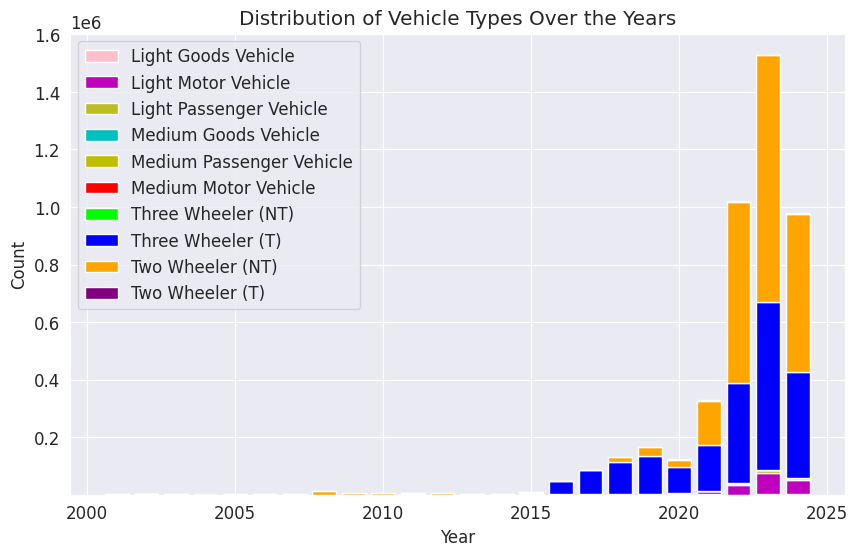

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for each vehicle type
years = np.arange(2001, 2025)
light_goods_vehicle = grouped_df['LIGHT GOODS VEHICLE']
light_motor_vehicle = grouped_df['LIGHT MOTOR VEHICLE']
light_passenger_vehicle = grouped_df['LIGHT PASSENGER VEHICLE']
medium_goods_vehicle = grouped_df['MEDIUM GOODS VEHICLE']
medium_passenger_vehicle = grouped_df['MEDIUM PASSENGER VEHICLE']
medium_motor_vehicle = grouped_df['MEDIUM MOTOR VEHICLE']
three_wheeler_nt = grouped_df['THREE WHEELER(NT)']
three_wheeler_t = grouped_df['THREE WHEELER(T)']
two_wheeler_nt = grouped_df['TWO WHEELER(NT)']
two_wheeler_t = grouped_df['TWO WHEELER(T)']

# Data
data = np.vstack([light_goods_vehicle, light_motor_vehicle, light_passenger_vehicle, medium_goods_vehicle,
                  medium_passenger_vehicle, medium_motor_vehicle, three_wheeler_nt,
                  three_wheeler_t, two_wheeler_nt, two_wheeler_t])

labels = ['Light Goods Vehicle', 'Light Motor Vehicle', 'Light Passenger Vehicle', 'Medium Goods Vehicle',
          'Medium Passenger Vehicle', 'Medium Motor Vehicle', 'Three Wheeler (NT)',
          'Three Wheeler (T)', 'Two Wheeler (NT)', 'Two Wheeler (T)']

colors = ['pink', 'm', 'tab:olive', 'c', 'y', 'r', 'lime', 'blue', 'orange', 'purple']

# Plotting stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(years))
for i, label in enumerate(labels):
    ax.bar(years, data[i], bottom=bottom, color=colors[i], label=label)
    bottom += data[i]

ax.set_title('Distribution of Vehicle Types Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend()
plt.show()


From the above stacked bar plot, it can be visualized that Two Wheeler (NT), which refers to non-transport or personal-use motorcycles and scooters meant for private use, have the highest demand. This is followed by Three Wheeler (T) transport vehicles like e-autos and light Motor Vehicles, which include cars designed for private use, vans (small vans used for personal purposes), and utility vehicles (SUVs and similar vehicles). These are potential market segments, and investing in them is worthwhile.

# Identifying trends and patterns over time for each vehicle category
Using heatmaps to visualize data with vehicle categories on the y-axis and years on the x-axis. darker for a particular category indicates an increase in the number of vehicles registration over time.

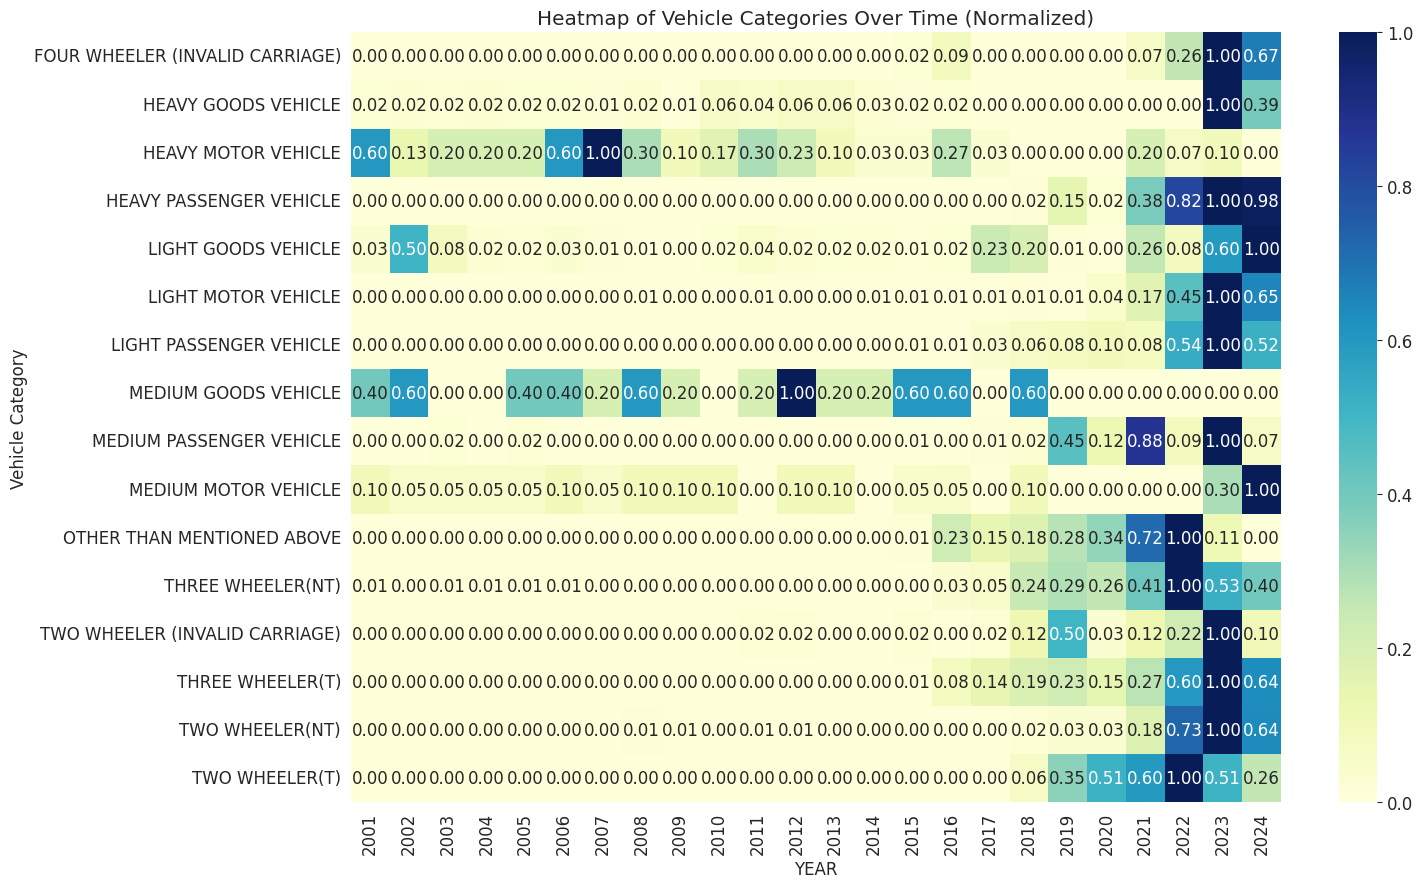

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize the data (so that all get equal representation despite there varying quantity)
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(grouped_df), columns=grouped_df.columns, index=grouped_df.index)

# Plot the normalized data
plt.figure(figsize=(15, 10))
sns.heatmap(normalized_df.T, cmap="YlGnBu", annot=True, fmt=".2f")
plt.xlabel('YEAR')
plt.ylabel('Vehicle Category')
plt.title('Heatmap of Vehicle Categories Over Time (Normalized)')
plt.show()


>Notably, since 2020-2021, almost all vehicle categories have shown some progress. However, there have been fluctuations over the years, indicating that EVs are gaining popularity.

In [ ]:
transpose_df = grouped_df.transpose()
transpose_df = transpose_df.reset_index()
transpose_df.columns = transpose_df.columns.astype(str)
transpose_df.head(3)

year_only                            index  2001  2002  2003  2004  2005  \
0          FOUR WHEELER (INVALID CARRIAGE)     0     0     0     0     0   
1                      HEAVY GOODS VEHICLE     7     8     6     8     7   
2                      HEAVY MOTOR VEHICLE    18     4     6     6     6   

year_only  2006  2007  2008  2009  ...  2015  2016  2017  2018  2019  2020  \
0             0     0     0     0  ...     1     4     0     0     0     0   
1             7     4     8     2  ...     5     7     1     0     0     0   
2            18    30     9     3  ...     1     8     1     0     0     0   

year_only  2021  2022  2023  2024  
0             3    12    46    31  
1             0     0   330   129  
2             6     2     3     0  

[3 rows x 25 columns]

In [ ]:
transpose_df.shape

(16, 25)

 # Applying KMeans clustering to segment the market for 4-wheeler vehicles based on demand data from 2018 to 2024.


> Extracting the 4 wheeler that has seen an high demand and been a potential segment per year to get a best target vehicle category. Inshort, which 4 wheeler to produce to get a secure market


 identify distinct target markets based on 4W vehicle types, to understand which category has the most demand and is worth focusing on for future business opportunities.  segmenting data based on vehicle categories and apply clustering techniques to identify different groups of vehicles that share similar demand characteristics.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the 4-wheeler vehicle categories to consider as segments
four_wheeler_categories = [
    'HEAVY MOTOR VEHICLE',
    'HEAVY PASSENGER VEHICLE',
    'LIGHT MOTOR VEHICLE',
    'LIGHT PASSENGER VEHICLE',
    'MEDIUM MOTOR VEHICLE',
    'MEDIUM PASSENGER VEHICLE'
]
# Filter the dataframe to only include these categories
filter_df = transpose_df[transpose_df['index'].isin(four_wheeler_categories)]

# Select years for market segmentation (e.g., demand over 2020-2024)
years_of_interest = ['2018','2019','2020', '2021', '2022', '2023', '2024']

# Create a new dataframe that only includes demand data over selected years
demand_data = filter_df[years_of_interest]


In [ ]:
filter_df.columns

Index(['index', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object', name='year_only')

In [ ]:
demand_data

year_only  2018  2019  2020   2021   2022   2023   2024
2             0     0     0      6      2      3      0
3            36   371    53    921   1962   2397   2357
5          1143  1015  3268  12304  33250  73275  47837
6           595   710   945    726   4991   9274   4844
8             7   130    35    254     25    289     19
9             2     0     0      0      0      6     20

In [ ]:
demand_data.columns

Index(['2018', '2019', '2020', '2021', '2022', '2023', '2024'], dtype='object', name='year_only')

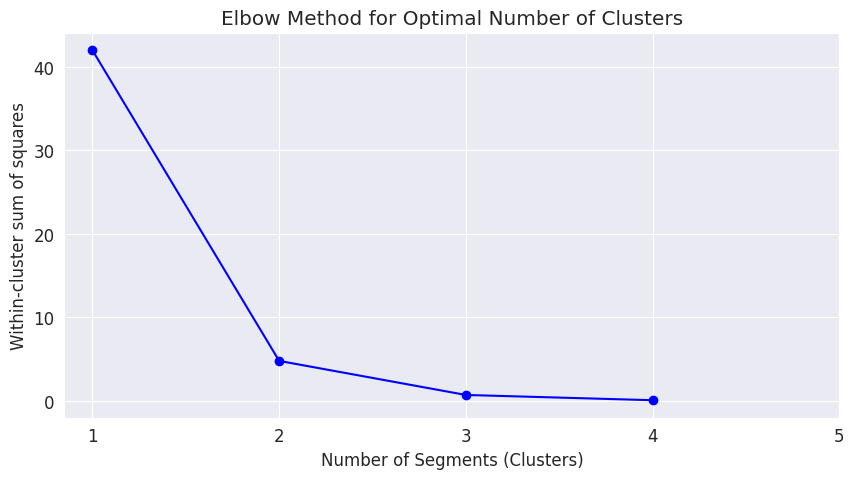

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Normalize the data (excluding 'year_only' here index)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(demand_data)

nrep =10
num_segments = range(1,5)
within_cluster_distances = []
for k in num_segments:
  kmeans = KMeans(n_clusters=k, n_init=nrep)
  kmeans.fit(normalized_data)
  within_cluster_distances.append((kmeans.inertia_))

plt.plot(range(1,5), within_cluster_distances, marker='o',linestyle='-',color='b' )
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Within-cluster sum of squares')
plt.xticks(range(1,6))
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
n_cluster_range= range(2,6)
for k in n_cluster_range:
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(normalized_data)
  print('cluster size -',k, 'Silhoutte score -', silhouette_score(normalized_data, kmeans.labels_))

cluster size - 2 Silhoutte score - 0.6690244696020047
cluster size - 3 Silhoutte score - 0.4858346492300365
cluster size - 4 Silhoutte score - 0.35885747004313645
cluster size - 5 Silhoutte score - 0.3286183118001223


In [ ]:
# Applying KMeans clustering to segment the market
kmeans =KMeans(n_clusters=2, random_state=42)
filter_df['cluster'] = kmeans.fit_predict(demand_data)

As per the segementation technique 2 groups are formed (Below).



 Review Cluster Labels:
 After running a KMeans clustering algorithm, each vehicle will be assigned a cluster label indicating which group it belongs to. By reviewing these labels, will identify which two or more vehicle types end up in the same segment.





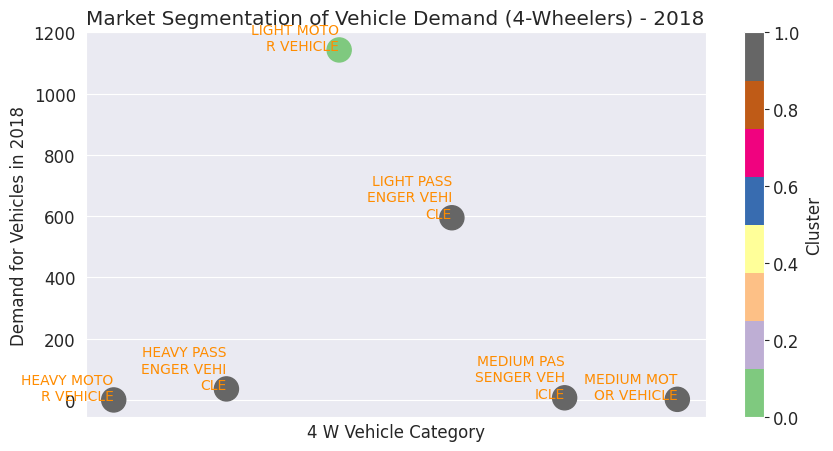

In [ ]:

# Plot the market segmentation for 2018
# Scatter plot to show clustering by vehicle category
scatter = plt.scatter(filter_df['index'], demand_data['2018'], c=filter_df['cluster'], cmap='Accent', s=300)

# Add labels for vehicle categories, wrapping into multiple lines
for i, txt in enumerate(filter_df['index']):
    wrapped_txt = '\n'.join([txt[j:j+10] for j in range(0, len(txt), 10)])  # Adjust the number 10 based on your preference
    plt.text(filter_df['index'].iloc[i], demand_data['2018'].iloc[i], wrapped_txt, fontsize=10, ha='right', color='darkorange')

# Add labels and title
plt.title('Market Segmentation of Vehicle Demand (4-Wheelers) - 2018')
plt.ylabel('Demand for Vehicles in 2018')
plt.xlabel('4 W Vehicle Category')
plt.colorbar(label='Cluster')
plt.xticks([])  # Remove x-axis labels
plt.grid(True)

# Display the plot
plt.show()

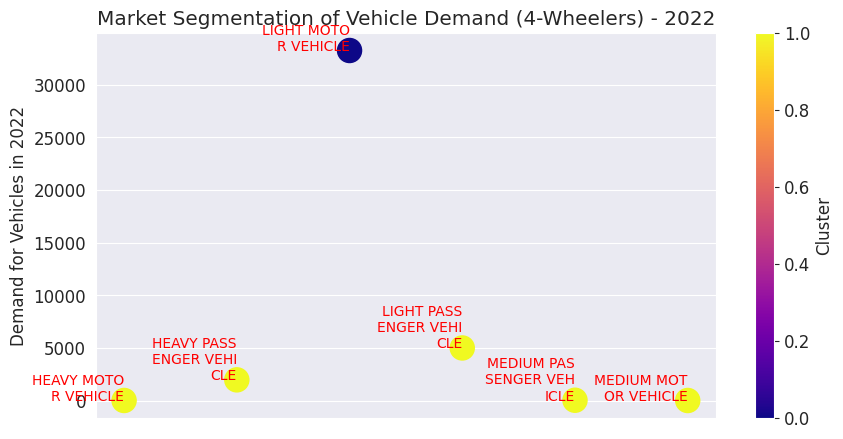

In [ ]:

# Plot the market segmentation for 2022
# Scatter plot to show clustering by vehicle category
scatter = plt.scatter(filter_df['index'], demand_data['2022'], c=filter_df['cluster'], cmap='plasma', s=300)

# Add labels for vehicle categories, wrapping into multiple lines
for i, txt in enumerate(filter_df['index']):
    wrapped_txt = '\n'.join([txt[j:j+10] for j in range(0, len(txt), 10)])  # Adjust the number 10 based on your preference
    plt.text(filter_df['index'].iloc[i], demand_data['2022'].iloc[i], wrapped_txt, fontsize=10, ha='right', color='red')

# Add labels and title
plt.title('Market Segmentation of Vehicle Demand (4-Wheelers) - 2022')
plt.ylabel('Demand for Vehicles in 2022')
plt.colorbar(label='Cluster')
plt.xticks([])  # Remove x-axis labels
plt.grid(True)

# Display the plot
plt.show()

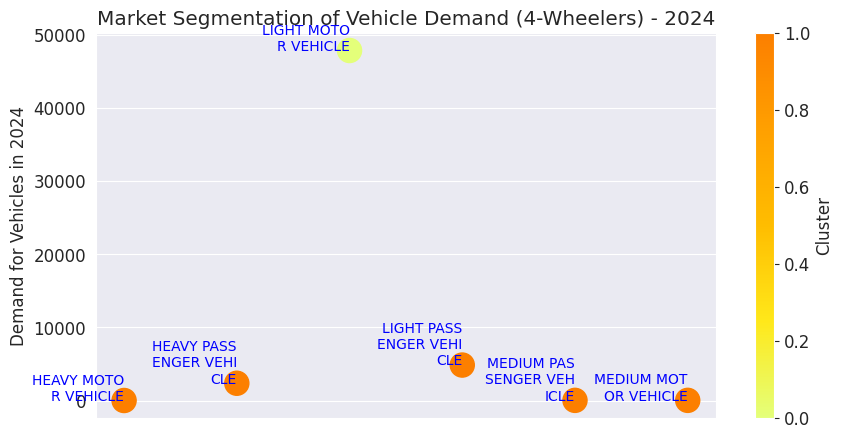

In [ ]:

# Plot the market segmentation for 2024
# Scatter plot to show clustering by vehicle category
scatter = plt.scatter(filter_df['index'], demand_data['2024'], c=filter_df['cluster'], cmap='Wistia', s=300)

# Add labels for vehicle categories, wrapping into multiple lines
for i, txt in enumerate(filter_df['index']):
    wrapped_txt = '\n'.join([txt[j:j+10] for j in range(0, len(txt), 10)])  # Adjust the number 10 based on your preference
    plt.text(filter_df['index'].iloc[i], demand_data['2024'].iloc[i], wrapped_txt, fontsize=10, ha='right', color='blue')

# Add labels and title
plt.title('Market Segmentation of Vehicle Demand (4-Wheelers) - 2024')
plt.ylabel('Demand for Vehicles in 2024')
plt.colorbar(label='Cluster')
plt.xticks([])  # Remove x-axis labels

# Display the plot
plt.show()

From the **segmentation analysis** conducted for the years **2018, 2022, and 2024**, we can observe that all vehicles are seeing rising demand year by year, proving that EVs are making a significant presence in the Indian market. In 4 W category **2 segments are been formed**. This segmentation helps to identify and understand which vehicle categories are experiencing higher vs. lower demand.

1. Yellow Cluster (above): The **light motor vehicle category** falls into this cluster and has significantly higher demand, around 50,000 in 2024. This suggests that light motor vehicles are in a very different market segment, characterized by higher demand, likely indicating a popular category with strong consumer interest.

2. Orange Cluster: The rest of the vehicle categories, which generally have lower demand, fall into this cluster. This could represent vehicle categories with more consistent but lower demand, possibly associated with more niche or industrial vehicles.



> Conclusion: **Potential Segment**: Light motor vehicles might be more popular or in greater demand than other vehicle categories. Thus, there could be **growth opportunities** in expanding the market for light motor vehicles, as they may represent a growing consumer preference. However, even from the second segment, **Light Passenger Vehicles** could act as a target vehicle category as they are more popular in their own segment.



# Analysing the Behavioural, Demographical and Geographical characteristic of the segment/consumers

In [ ]:
import pandas as pd
general_df = pd.read_excel('/content/drive/MyDrive/csv files/1job-seekers.xlsx')
general_df.head()

Name      Mobile                          Email  \
0          PANKAJKUMAR  9959146000           pankajhiya@yahoo.com   
1     somasekhar reddy  9848172697         somuakepati@rediff.com   
2         KEERTHIlanka  9985719671  keerthi_lanka2006@yahoo.co.in   
3    mutnurisaikishore  9989499424     mutnurisai1980@yahoo.co.in   
4  pavan kumar kosadgi  9848795464   pavansupermax@rediffmail.com   

                                             Address        City  \
0  MOULI TOWERS, FLAT NO. 2-1 2ND FLOOR, CHANDRAM...  Vijayawada   
1  PLOT NO.78, K.P.NAGAR, NEAR BENZ CIRCLE, VIJAY...  Vijayawada   
2  D/O L.VENKATESWARA RAO, D.NO:32-1-7, PRAJASAKT...  Vijayawada   
3  M.SAIKISHORE C\O SERR LAKSHMI HOMELAND APPT.. ...  Vijayawada   
4  HNo:5-11-674, RTC Colony, Yellammagutta, Nizam...  Vijayawada   

                   DOB  Gender                             Functional_Area  \
0  1966-12-08 00:00:00    Male  Engg. project Mgmt./site Engg./Civil Engg.   
1  1976-06-20 00:00:00    Male                  Sales/Business Development   
2  1987-05-01 00:00:00  Female                       IT/Telecom - Hardware   
3  1980-03-11 00:00:00    Male          Banks/Insurance/Financial Services   
4  1973-11-27 00:00:00    Male                  Sales/Business Development   

                              Area_of_Specialization  \
0  Building/Residential, Civil, Commercial, Highw...   
1                                       Retail Sales   
2                                    Hardware Design   
3                                   Banking -General   
4                                      Channel Sales   

                               Industry  ... Work_Experience  \
0  Construction/Cement/Metal/Steel/Iron  ...              17   
1                                Others  ...               8   
2                  Engineering/Projects  ...        6 months   
3                               Banking  ...               7   
4                Consumer Durables/FMCG  ...              10   

                                  Level  \
0  Senior -Sr. Manager, General Manager   
1         Junior - Executive, Assistant   
2   Middle - Manager, Assistant Manager   
3         Junior - Executive, Assistant   
4   Middle - Manager, Assistant Manager   

                           Preferred_Location Course(Highest_Education)  \
0                     Anywhere in North India                 BE/B.Tech   
1                     Hyderabad/ Secunderabad                  MBA/PGDM   
2                      Anywhere in East India                 BE/B.Tech   
3                               No Preference                     B.Com   
4  Hyderabad/ Secunderabad,Nizamabad,Warangal                  MBA/PGDM   

  Specialization(Highest_Education) Institute(Highest_Education)  \
0                             Civil              Pune University   
1                         Marketing                        IGNOU   
2     Electronics/Telecommunication            Andhra University   
3                   Commerce Honors         Nagarjuna University   
4    Advertising/Mass Communication           Shivaji University   

  Course(2nd_Highest_Education) Specialization(2nd_Highest_Education)  \
0                     BE/B.Tech                                 Civil   
1                      MBA/PGDM                             Marketing   
2                          12th                            Other 12th   
3                       Diploma                             Computers   
4                         B.Com                         Commerce Pass   

  Institute(2nd_Highest_Education)  Resume_Id  
0                  Pune University  109951899  
1                            IGNOU  106447071  
2             Nagarjuna University  107743383  
3      Jawaharlal Nehru University  109008155  
4               Osmania University   42837378  

[5 rows x 24 columns]

In [ ]:
general_df.columns

Index(['Name', 'Mobile', 'Email', 'Address', 'City', 'DOB', 'Gender',
       'Functional_Area', 'Area_of_Specialization', 'Industry', 'Resume_Title',
       'Key_Skills', 'Company', 'Salary', 'Work_Experience', 'Level',
       'Preferred_Location', 'Course(Highest_Education)',
       'Specialization(Highest_Education)', 'Institute(Highest_Education)',
       'Course(2nd_Highest_Education)',
       'Specialization(2nd_Highest_Education)',
       'Institute(2nd_Highest_Education)', 'Resume_Id'],
      dtype='object')

In [ ]:
general_df = general_df.drop(columns=['Name','Mobile','Email','Address',
                                      'Resume_Id','Resume_Title'], axis=1)
general_df.columns

Index(['City', 'DOB', 'Gender', 'Functional_Area', 'Area_of_Specialization',
       'Industry', 'Key_Skills', 'Company', 'Salary', 'Work_Experience',
       'Level', 'Preferred_Location', 'Course(Highest_Education)',
       'Specialization(Highest_Education)', 'Institute(Highest_Education)',
       'Course(2nd_Highest_Education)',
       'Specialization(2nd_Highest_Education)',
       'Institute(2nd_Highest_Education)'],
      dtype='object')

In [ ]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   City                                   161 non-null    object
 1   DOB                                    161 non-null    object
 2   Gender                                 161 non-null    object
 3   Functional_Area                        161 non-null    object
 4   Area_of_Specialization                 161 non-null    object
 5   Industry                               161 non-null    object
 6   Key_Skills                             161 non-null    object
 7   Company                                160 non-null    object
 8   Salary                                 161 non-null    object
 9   Work_Experience                        161 non-null    object
 10  Level                                  161 non-null    object
 11  Preferred_Location 

In [ ]:
general_df.Functional_Area.nunique()

40

Grouping similar values together i.e mapping broad categories.

In [ ]:
# Step 1: Define the mapping for grouping the values into broader categories
group_mapping = {
    'Engg. project Mgmt./site Engg./Civil Engg.': 'Engineering / Technical',
    'Sales/Business Development': 'Sales and Marketing',
    'IT/Telecom - Hardware': 'IT / Telecom',
    'Banks/Insurance/Financial Services': 'Finance / Accounting',
    'Accounting/Tax/Company Secretary/Audit, Administration, Finance': 'Finance / Accounting',
    'Accounting/Tax/Company Secretary/Audit': 'Finance / Accounting',
    'Production/Manufacturing/Maintenance/Packaging': 'Production / Manufacturing / Quality Control',
    'HR/PM/IR/Training, IT/Telecom - Hardware': 'IT / Telecom',
    'Operations/Customer Service/Telecalling/Backend': 'Operations / Customer Service',
    'Front Office Staff/Secretarial/Computer Operator': 'Operations / Customer Service',
    'HR/PM/IR/Training': 'HR / Training',
    'IT/Telecom - Software': 'IT / Telecom',
    'Bio Tech/R&D/Scientist': 'Medical / Healthcare',
    'Fresh Graduate-No Functional Area exp.': 'Fresh Graduate / No Experience',
    'Others': 'Others',
    'Quality/Process Control': 'Production / Manufacturing / Quality Control',
    'Marketing/MR/Media Planning': 'Sales and Marketing',
    'Administration, HR/PM/IR/Training': 'HR / Training',
    'Doctors/Nurses/Medical Professional': 'Medical / Healthcare',
    'Banks/Insurance/Financial Services, Others': 'Finance / Accounting',
    'Finance': 'Finance / Accounting',
    'Banks/Insurance/Financial Services, HR/PM/IR/Training, Top Management': 'HR / Training',
    'Teaching/Education': 'Others',
    'Administration': 'Others',
    'Materials/Logistics/Supply Chain Mgmt/Procurement, Oil and Gas': 'Operations / Customer Service',
    'Corporate Planning/Consulting/Strategy, Doctors/Nurses/Medical Professional, Top Management': 'Legal / Consulting / Strategy',
    'Engg. project Mgmt./site Engg./Civil Engg., Oil and Gas, Production/Manufacturing/Maintenance/Packaging': 'Engineering / Technical',
    'IT/Telecom - Software, IT/Telecom - Hardware': 'IT / Telecom',
    'Materials/Logistics/Supply Chain Mgmt/Procurement': 'Operations / Customer Service',
    'Engg. project Mgmt./site Engg./Civil Engg., Oil and Gas, Quality/Process Control': 'Engineering / Technical',
    'Electronics, Engg. project Mgmt./site Engg./Civil Engg., Production/Manufacturing/Maintenance/Packaging': 'Engineering / Technical',
    'Advertising/PR/Events': 'Sales and Marketing',
    'Hotel/Restaurant': 'Others',
    'Legal/Law': 'Legal / Consulting / Strategy',
    'Anchoring/TV/Films/Production, Banks/Insurance/Financial Services, Finance': 'Sales and Marketing',
    'Service Engineers': 'Engineering / Technical',
    'IT/Telecom - Software, Advertising/PR/Events, Anchoring/TV/Films/Production': 'Sales and Marketing',
    'Engg. project Mgmt./site Engg./Civil Engg., Oil and Gas, Others': 'Engineering / Technical',
    'Administration, Fresh Graduate-No Functional Area exp., HR/PM/IR/Training': 'HR / Training',
    'Production/Manufacturing/Maintenance/Packaging, Quality/Process Control': 'Production / Manufacturing / Quality Control'
}

# Step 2: Apply the mapping to create a new column with the grouped values
general_df['Functional_Area_Grouped'] = general_df["Functional_Area"].map(group_mapping)

# Step 3: Apply One-Hot Encoding to the 'functional_area_group' column
df_encoded = pd.get_dummies(general_df['Functional_Area_Grouped'], prefix='', prefix_sep='')


In [ ]:
df_encoded.head(2)

Engineering / Technical  Finance / Accounting  \
0                     True                 False   
1                    False                 False   

   Fresh Graduate / No Experience  HR / Training  IT / Telecom  \
0                           False          False         False   
1                           False          False         False   

   Legal / Consulting / Strategy  Medical / Healthcare  \
0                          False                 False   
1                          False                 False   

   Operations / Customer Service  Others  \
0                          False   False   
1                          False   False   

   Production / Manufacturing / Quality Control  Sales and Marketing  
0                                         False                False  
1                                         False                 True

# Behavioural segmentation

In [ ]:
behavour_df = pd.concat([df_encoded, general_df['Work_Experience']], axis=1)
behavour_df.head(2)

Engineering / Technical  Finance / Accounting  \
0                     True                 False   
1                    False                 False   

   Fresh Graduate / No Experience  HR / Training  IT / Telecom  \
0                           False          False         False   
1                           False          False         False   

   Legal / Consulting / Strategy  Medical / Healthcare  \
0                          False                 False   
1                          False                 False   

   Operations / Customer Service  Others  \
0                          False   False   
1                          False   False   

   Production / Manufacturing / Quality Control  Sales and Marketing  \
0                                         False                False   
1                                         False                 True   

  Work_Experience  
0              17  
1               8

In [ ]:
behavour_df.Work_Experience.unique()

array([17, 8, '6 months', 7, 10, 4, 23, 2, 6, 5, 1, 9, 3, 20, 13, 22, 11,
       14, 12, 19, 16, '6', '3', '2', '5', '12', '1', '4', 18],
      dtype=object)

In [ ]:
# Function to convert work experience to years
def convert_experience_to_years(experience):
  if isinstance(experience,str) and 'months' in experience:
    months = int(experience.split()[0])
    return months/12
  return float(experience)

# Apply the function to the 'Work_Experience' column
behavour_df['Work_Experience'] = behavour_df['Work_Experience'].apply(convert_experience_to_years)
behavour_df.Work_Experience.unique()

array([17. ,  8. ,  0.5,  7. , 10. ,  4. , 23. ,  2. ,  6. ,  5. ,  1. ,
        9. ,  3. , 20. , 13. , 22. , 11. , 14. , 12. , 19. , 16. , 18. ])

In [ ]:
behavour_df['Work_Experience'] = behavour_df['Work_Experience'].astype(float)
behavour_df['Work_Experience'].dtype

dtype('float64')

Since are columns are 12 and we wish to visualize the outcome of whole will use PCA then KMeans and then plotting.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

x_scaled = scaler.fit_transform(behavour_df)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
for n_cluster in range(2,8):
  cluster_model = AgglomerativeClustering(n_clusters=n_cluster,
                                          metric='euclidean',linkage='ward')
  #'AgglomerativeClustering' object has no attribute 'labels_' so we did fit_predict to get labels
  cluster_labels = cluster_model.fit_predict(x_pca)

  silhoute_avg = silhouette_score(x_pca, cluster_labels, metric='euclidean')
  print(f"For n_clusters={n_cluster}, the average silhouette score is: {silhoute_avg}")


For n_clusters=2, the average silhouette score is: 0.5788220203623317
For n_clusters=3, the average silhouette score is: 0.653149994959851
For n_clusters=4, the average silhouette score is: 0.5635161469829484
For n_clusters=5, the average silhouette score is: 0.5379138279263636
For n_clusters=6, the average silhouette score is: 0.5434746972803967
For n_clusters=7, the average silhouette score is: 0.5401575818488805


In [ ]:
# Fitting 3 clusters as per silhoutee score
cluster_model = AgglomerativeClustering(n_clusters=3,
                                        metric='euclidean', linkage='ward')
cluster_labels = cluster_model.fit_predict(x_pca)

In [ ]:
print(pca.components_)

[[ 0.34822528  0.09958045 -0.18256135 -0.14872487 -0.30723997 -0.01578944
  -0.32428328 -0.10371573  0.40293594 -0.0921077   0.09082543  0.65093963]
 [-0.14580345  0.89456307 -0.01051148 -0.02344481 -0.10408841 -0.02634537
  -0.08671063 -0.04374822 -0.20087041 -0.10711172 -0.32387252 -0.01271807]]


Each column in pca.components_ represents a principal component, and each value in the component array represents the weight of a feature in that principal component. Larger absolute values indicate that the feature contributes more to that component.

**Based on the functional area and work experience 3 segments are formed as can be visualized below.**

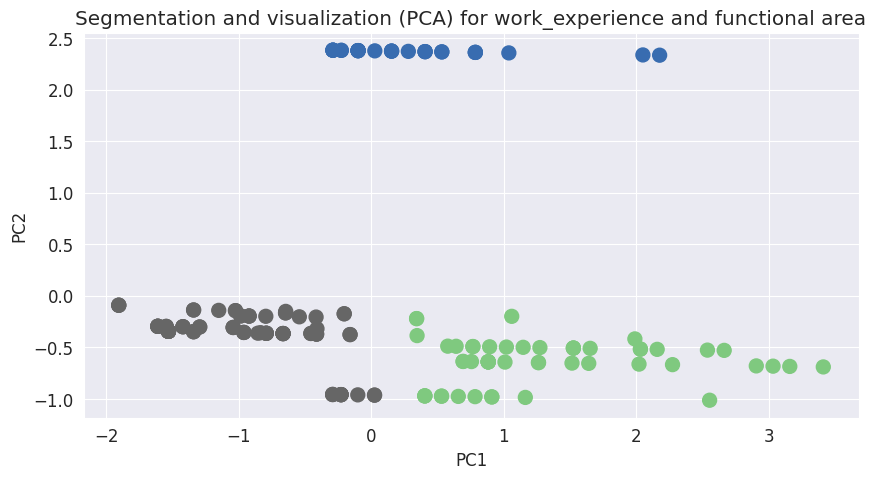

In [ ]:

#plotting
plt.scatter(x_pca[:,0], x_pca[:,1], c= cluster_labels, cmap='Accent', s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segmentation and visualization (PCA) for work_experience and functional area')
plt.show()

Inorder to intrepret/analyze what the segments/clusters represent or to examine the characteristics of each cluster we look at the **mean values of the original features within each cluster**. The mean values allow to compare different clusters, see how they differ from each other and identify unique features of each segment.

In [ ]:
behavour_df['cluster'] = cluster_labels
cluster_means = behavour_df.groupby('cluster').mean()
cluster_means

Engineering / Technical  Finance / Accounting  \
cluster                                                  
0                       0.326923                   0.0   
1                       0.000000                   1.0   
2                       0.000000                   0.0   

         Fresh Graduate / No Experience  HR / Training  IT / Telecom  \
cluster                                                                
0                              0.000000       0.000000      0.000000   
1                              0.000000       0.000000      0.000000   
2                              0.036585       0.073171      0.219512   

         Legal / Consulting / Strategy  Medical / Healthcare  \
cluster                                                        
0                             0.019231              0.000000   
1                             0.000000              0.000000   
2                             0.048780              0.207317   

         Operations / Customer Service    Others  \
cluster                                            
0                             0.038462  0.365385   
1                             0.000000  0.000000   
2                             0.097561  0.000000   

         Production / Manufacturing / Quality Control  Sales and Marketing  \
cluster                                                                      
0                                            0.038462             0.211538   
1                                            0.000000             0.000000   
2                                            0.182927             0.134146   

         Work_Experience  
cluster                   
0               8.509615  
1               5.296296  
2               2.262195

Describing the Segmentation or intrepreting the clusters:<br>

#### Cluster 1:  

**High mean for work_exp**, this cluster represent customers with a high level of work experience (0.722806) and a strong presence in engineering/technical (0.326923), others, sales/marketing (0.211538).
<br> This cluster represents customers who are experienced professionals with a strong technical background and possibly some exposure to sales/marketing.

#### Cluster 2:  
**High mean for "Finance/Accounting"**(1.0)
,but **low work exp** (0.098583). This group may include younger or newer employees in this area. It suggests that people in this cluster  are predominantly working in finance or accounting-related roles but are having less experience.  They are likely fresh graduates or early-career professionals in finance.


#### Cluster 3:  
**Mixed background**: The third cluster has a more complex distribution across various fields, but here are the key points:
  - "Engineering/Technical" is relatively low (0.0).
  - "Finance/Accounting" is also 0.0.
  - "Fresh Graduate/No Experience" has a small value (0.036585), indicating that there may be some individuals with little to no experience.
  - Dominance in "IT/Telecom" (0.219512) and "Medical/Healthcare" (0.207317), which suggests a strong presence in these fields.
  - **"Work_Experience" is negative** (-0.490825), which seems to indicate that this cluster might have **less work experience overall**, possibly suggesting people are relatively newer or transitioning into the workforce.
  they might include those who have just started or are pivoting into these industries.

*age range is from 35 to 81 so it means customers might be transitioning into new area or are late starter*

# Demographic Segmentation

In [ ]:
# demographic_df.DOB.unique() == some values are like this '22-May-1979', '25-Aug-1983'

In [ ]:
# Convert string dates to datetime
general_df['DOB'] = pd.to_datetime(general_df['DOB'], errors='coerce', dayfirst=True)
general_df.DOB.dtypes

dtype('<M8[ns]')

In [ ]:
from datetime import datetime
# calculate age from DOB
def calculate_age(dob):
  today = datetime.today()
  return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

general_df['Age'] = general_df['DOB'].apply(lambda x: calculate_age(x) if pd.notnull(x) else None)

In [ ]:
general_df.Age.unique()

array([58, 48, 37, 44, 51, 56, 45, 35, 64, 39, 49, 42, 43, 40, 50, 47, 55,
       41, 59, 36, 61, 46, 57, 81, 72, 54, 53, 62, 52, 70, 65, 38])

In [ ]:
general_df.Age.nunique()

32

In [ ]:
general_df.Age.min(), general_df.Age.max()

(35, 81)

In [ ]:
general_df['Course(Highest_Education)'].unique()

array(['BE/B.Tech', 'MBA/PGDM', 'B.Com', 'B.Sc', 'Others', 'M.Sc', 'BBA',
       'B.A.', 'M.Com', 'MCA/PGDCA', 'ME/M.Tech', 'BDS', 'Diploma',
       'MBBS', 'MD/MS', 'M.Ed', 'MA', 'ICWA', 'BGL', 'BL/LLB', 'M.Phil',
       'Doctorate(Phd)', '12th', 'ML/LLM', 'CA'], dtype=object)

In [ ]:
general_df['Course(Highest_Education)'].nunique()

25

In [ ]:
general_df.Gender.unique()

array(['Male', 'Female'], dtype=object)

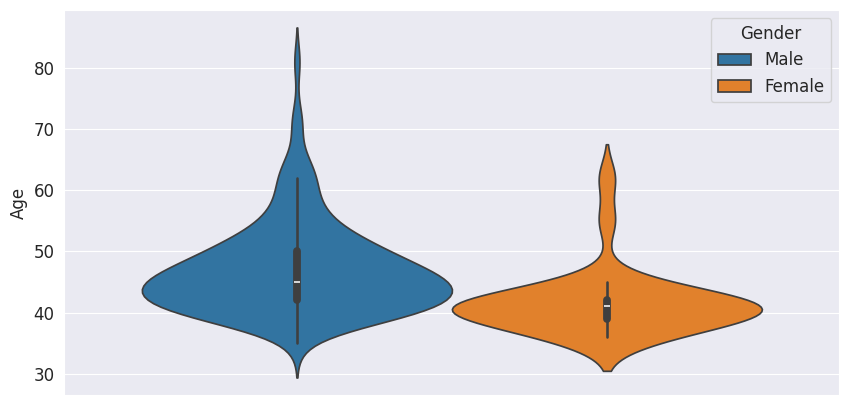

In [ ]:
sns.violinplot(y='Age', data=general_df, hue='Gender')
plt.show()

Women customers are relatively younger than men. Though fewer in number, these working women can turn out to be potential EV buyers, and men could also be turning into potential buyers.

In [ ]:
general_df['Institute(Highest_Education)'].unique()

array(['Pune University', 'IGNOU', 'Andhra University',
       'Nagarjuna University', 'Shivaji University', 'Others',
       'Algappa University', 'Rajasthan University',
       'Kakatiya University', 'JNTU Hyderabad',
       'Sri Venkateshwara University', 'Jawaharlal Nehru University',
       'Osmania University', 'IIT Chennai',
       'Board of Technical Education', 'Bangalore University',
       'Calcutta University', 'Patna University',
       'Aligarh Muslim University', 'ICWA', 'Karanataka University',
       'Devi Ahilya University', 'NIT/RECs', 'Mumbai University',
       'Sardar Patel University', 'Gujarat University',
       'Ranchi University', 'Madurai Kamaraj University',
       'Saurashtra University', 'Nagpur University',
       'South Gujarat University Surat', 'Gulbarga University',
       'Visveshwaraiah University', 'Annamalai University',
       'Anna University', 'ICFAI', 'Delhi University',
       'Amaravati University',
       'Institute of Chartered Accountant

In [ ]:
general_df['Institute(Highest_Education)'].nunique()

40

In [ ]:
!pip install plotly

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import plotly.express as px
from sklearn.cluster import KMeans

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
demographic_df = general_df[['Age','Gender','Course(Highest_Education)','Institute(Highest_Education)']]


In [ ]:
demographic_df.isna().sum()

Age                             0
Gender                          0
Course(Highest_Education)       0
Institute(Highest_Education)    0
dtype: int64

In [ ]:
demographic_df.dropna(inplace=True)

In [ ]:
scaler = StandardScaler()
demographic_df['Age'] = scaler.fit_transform(demographic_df[['Age']])

In [ ]:
course_dummies = pd.get_dummies(demographic_df['Course(Highest_Education)'], prefix='', prefix_sep='')
institute_dummies = pd.get_dummies(demographic_df['Institute(Highest_Education)'], prefix='', prefix_sep='')
gender_dummies = pd.get_dummies(demographic_df['Gender'], prefix='', prefix_sep='')

demographic_df = pd.concat([demographic_df, course_dummies, institute_dummies, gender_dummies], axis=1)
demographic_df.drop(['Course(Highest_Education)','Institute(Highest_Education)','Gender'], axis=1, inplace=True)


In [ ]:
demographic_df.head(2)

Age   12th   B.A.  B.Com   B.Sc    BBA    BDS  BE/B.Tech    BGL  \
0  1.608371  False  False  False  False  False  False       True  False   
1  0.257574  False  False  False  False  False  False      False  False   

   BL/LLB  ...  Rajasthan University  Ranchi University  \
0   False  ...                 False              False   
1   False  ...                 False              False   

   Sardar Patel University  Saurashtra University  Shivaji University  \
0                    False                  False               False   
1                    False                  False               False   

   South Gujarat University Surat  Sri Venkateshwara University  \
0                           False                         False   
1                           False                         False   

   Visveshwaraiah University  Female  Male  
0                      False   False  True  
1                      False   False  True  

[2 rows x 68 columns]

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
for n_cluster in range(2,11):
  cluster_model = AgglomerativeClustering(n_clusters=n_cluster,
                                          metric='manhattan', linkage='complete')
  cluster_labels = cluster_model.fit_predict(demographic_df)
  #'AgglomerativeClustering' object has no attribute 'labels_' so we did fit_predict to get labels

  silhoutte_avg = silhouette_score(demographic_df,cluster_labels, metric='manhattan')
  print("For n_clusters = ", n_cluster, "the avg silhoutte score is", silhoutte_avg)



For n_clusters =  2 the avg silhoutte score is 0.21976725173729766
For n_clusters =  3 the avg silhoutte score is 0.11602541428742964
For n_clusters =  4 the avg silhoutte score is 0.10342952215420076
For n_clusters =  5 the avg silhoutte score is 0.12051342403529797
For n_clusters =  6 the avg silhoutte score is 0.13375981209986004
For n_clusters =  7 the avg silhoutte score is 0.1329526273293985
For n_clusters =  8 the avg silhoutte score is 0.14896218744582498
For n_clusters =  9 the avg silhoutte score is 0.1506938014170451
For n_clusters =  10 the avg silhoutte score is 0.15063602606242568


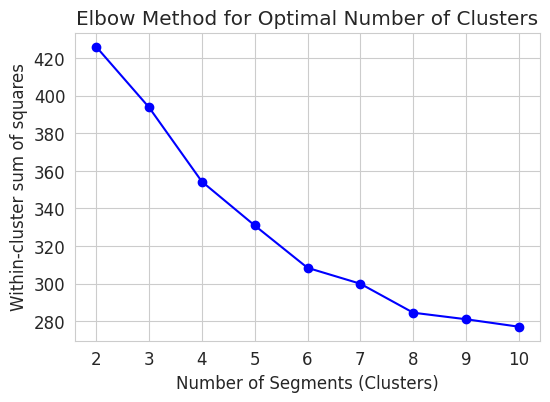

In [ ]:
nrep = 10
num_segments = range(2, 11)  # Range of cluster numbers from 2 to 10
within_cluster_distances = []

for k in num_segments:
    cluster_model = AgglomerativeClustering(n_clusters=k, metric='manhattan', linkage='complete')
    cluster_labels = cluster_model.fit_predict(demographic_df)

    # Calculate within-cluster sum of squares manually since AgglomerativeClustering doesn't have an inertia_ attribute
    within_cluster_sum_squares = 0
    for i in range(k):
        cluster_points = demographic_df[cluster_labels == i]
        if len(cluster_points) > 0:
            cluster_center = cluster_points.mean(axis=0)
            within_cluster_sum_squares += ((cluster_points - cluster_center) ** 2).sum().sum()

    within_cluster_distances.append(within_cluster_sum_squares)

# Plot the elbow method graph
plt.figure(figsize=(6, 4))
plt.plot(num_segments, within_cluster_distances, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Within-cluster sum of squares')
plt.xticks(num_segments)
plt.grid(True)
plt.show()


This elbow plot has no distinct elbow, so will follow a second approach to determining a good number of segments is to use
stability-based data structure analysis (Global Stability box-plot).

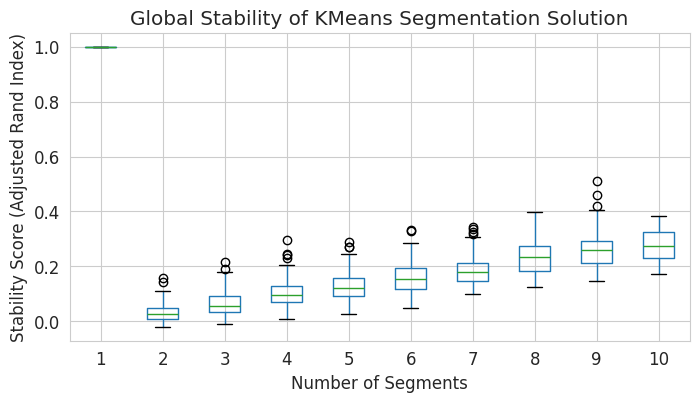

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
globality_stability_df = scaler.fit_transform(demographic_df)

# Remove duplicates
globality_stability_df = np.unique(globality_stability_df, axis=0)

def bootstrap_kmeans_ari(data, min_clusters=1, max_clusters=10, nboot=100, nrep=10):
    stability_results = {k: [] for k in range(min_clusters, max_clusters+1)}

    for k in range(min_clusters, max_clusters+1):
        for _ in range(nboot):
            # Bootstrap sample
            bootstrap_sample = resample(data, n_samples=len(data), random_state=np.random.randint(0, 10000))
            cluster_assignments = []

            for _ in range(nrep):
                kmeans = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
                kmeans.fit(bootstrap_sample)
                cluster_assignments.append(kmeans.labels_)

            # Compare cluster assignments using Adjusted Rand Index (ARI)
            ari_scores = []
            for i in range(nrep):
                for j in range(i+1, nrep):
                    # Calculate ARI between two different clusterings
                    ari = adjusted_rand_score(cluster_assignments[i], cluster_assignments[j])
                    ari_scores.append(ari)

            stability_results[k].append(np.mean(ari_scores))

    return stability_results


results = bootstrap_kmeans_ari(globality_stability_df, min_clusters=1, max_clusters=10, nboot=100, nrep=10)

# Convert the results into a DataFrame for easier plotting
stability_df = pd.DataFrame(results)

# Plotting the boxplot for global stability
plt.figure(figsize=(8, 4))
stability_df.boxplot()
plt.xlabel('Number of Segments')
plt.ylabel('Stability Score (Adjusted Rand Index)')
plt.title('Global Stability of KMeans Segmentation Solution')
plt.xticks(np.arange(len(stability_df.columns)) + 1, stability_df.columns)
plt.show()


Even after performing the **Global Stability analysis**, we are unable to find very stable or consistent segments. Global Stability measures how consistently the clustering algorithm produces the same results when applied to different samples or subsets of the data. A higher score indicates more stability and consistency.

A **score of 0.2** (for 10 segment solution) suggests that the clustering solution is relatively **unstable**, meaning that the clusters found by the KMeans algorithm may vary significantly across different samples or subsets. Therefore, we will stick with our **silhouette score**, which sugg**ests 2 segments.**

In [ ]:
new_df = general_df[['Age','Gender','Course(Highest_Education)','Institute(Highest_Education)']]

In [ ]:
hclus = AgglomerativeClustering(n_clusters=2)
new_df['cluster'] = hclus.fit_predict(demographic_df)

In [ ]:
new_df.columns

Index(['Age', 'Gender', 'Course(Highest_Education)',
       'Institute(Highest_Education)', 'cluster'],
      dtype='object')

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15,15)
sns.set_style('whitegrid')
# Select relevant columns
sunburst_data = new_df[['Age', 'Gender', 'cluster', 'Course(Highest_Education)', 'Institute(Highest_Education)']]

# Binning age into ranges
labels=['30-40','40-50','50-60','60+']
sunburst_data['Age'] = pd.cut(sunburst_data['Age'], bins=[30, 40, 50, 60, 80], labels=['30-40', '40-50', '50-60', '60+'])
sunburst_data = sunburst_data.dropna(subset=['Age'])


# Create sunburst plot
fig = px.sunburst(
    sunburst_data,
    path=['cluster', 'Gender', 'Age', 'Course(Highest_Education)', 'Institute(Highest_Education)'],
    #title="Demographic Segmentation - Sunburst Plot"
)
fig.update_layout(title_text='Sunburst Chart for Demographic Segmentation of customers (general charcteristics)',
                  title_x=0.5,width=900,height=600)
fig.show()



Analysing the sunburst plot ▶<br>Two segments are being formed. <br> Cluster 0 is the largest segment having people in the age group of 30 to 60 indicating working population - potential for being a target segment. <br>Cluster 1 is the smallest segment, consisting of people aged above 60. Although this segment is not very significant, it could become a potential segment if EV awareness grows among them, as they might become buyers for 4-wheel invalid carriages. These vehicles are often designed to offer enhanced mobility and independence for individuals with disabilities, mobility issues, or other health conditions that may affect their ability to drive conventional vehicles. <br> In cluster 0 female working professionals are less compare to male. <br> MBA/PGDDM, Diploma, BA, BSc, and MSc qualifications are more prevalent among Cluster 0 individuals. Drilling down the sunburst chart, males in the age group of 50 to 60 have their education in Diploma, BE, ICWA, MBA, and BSc. Females dominate in the qualifications of MBA, MCA, and BE/B.Tech.


> conclude: Cluster 0 individuals can act as innovators – they are more educated, more prosperous (working population), and more risk-oriented. On the other hand, cluster 1 individuals can fall into the early majority – older but educated.


# Geographic Segmentation

In [ ]:
general_df.Salary.head(3)

0    16,50,000 annually
1     2,00,000 annually
2     1,06,000 annually
Name: Salary, dtype: object

In [ ]:
general_df['Salary']= general_df.Salary.str.replace(',','')
general_df['Salary']= general_df.Salary.str.replace(' annually','')
general_df['Salary'].head(3)

0    1650000
1     200000
2     106000
Name: Salary, dtype: object

In [ ]:
general_df['Salary'] = general_df['Salary'].astype(float)
general_df['Salary'].dtype

dtype('float64')

In [ ]:
general_df.Salary.max(), general_df.Salary.min()

(2724000.0, 2000.0)

In [ ]:
general_df.City.unique()

array(['Vijayawada', 'Hyderabad', 'Anantapur', 'BIHAR(Jharkhand Dhanbad)',
       'BIHAR(purnea)', 'BIHAR(Raxaul)', 'BIHAR(Begusarai)',
       'BIHAR(bettiah)', 'BIHAR(Bihar, Gaya)', 'BIHAR(Darbhanga)',
       'BIHAR(Gaya)', 'BIHAR(raxaul)', 'BIHAR( Raghipur)',
       'BIHAR(hajipur)', 'BIHAR', 'CHHATTISGARH(Chhattisgarh,Korba)',
       'CHHATTISGARH(HIRMI,RAIPUR)', 'CHHATTISGARH(Korba)',
       'CHHATTISGARH(korba)', 'CHHATTISGARH(Raigarh)',
       'CHHATTISGARH(raigarh)', 'CHHATTISGARH', 'CHHATTISGARH(Bacheli)',
       'CHHATTISGARH(Durg)', 'CHHATTISGARH(jagdalpur)',
       'CHHATTISGARH(Jagdalpur)', 'CHHATTISGARH(KORBA (CG))',
       'CHHATTISGARH(KORBA)', 'GUJARAT(Gujarat)', 'GUJARAT(Patan)',
       'GUJARAT(Silvassa)', 'GUJARAT(Surendranagar)', 'GUJARAT',
       'Belgaum', 'MAHARASHTRA(yeola)', 'MAHARASHTRA(YAWATMAL)',
       'MAHARASHTRA(Yavatmal)', 'MAHARASHTRA(YAVATMAL)',
       'MAHARASHTRA(Washim)', 'MAHARASHTRA(washim)',
       'MAHARASHTRA(WASHIM)', 'MAHARASHTRA(Warora)',
 

In [ ]:
new_demographic_df = general_df['City'].copy()

In [ ]:

# Special city-state mappings
special_cities = {
    'Vijayawada': 'AndhraPradesh',
    'Hyderabad': 'Telangana',
    'Anantapur': 'AndhraPradesh',
    'Belgaum': 'Karnataka'
}

# Function to process the city-region pair
def process_city_region(city_region):
    # Check if the city is in the special_cities dictionary
    if city_region in special_cities:
        return special_cities[city_region], city_region

    # Extract state and city/region
    if '(' in city_region:
        state = city_region.split('(')[0].strip()
        city = city_region.split('(')[1].split(',')[0].strip(')')
    else:
        state = city_region.strip()
        city = city_region.strip()

    # Special handling for cities with multiple commas
    return state, city

# Applying the function to the data
processed_data = [process_city_region(item) for item in new_demographic_df]

# Convert to DataFrame for better visualization
new_demographic_df = pd.DataFrame(processed_data, columns=['State', 'City'])



In [ ]:
new_demographic_df.sample(5)

State               City
55          BIHAR  Jharkhand Dhanbad
110     Karnataka            Belgaum
75   CHHATTISGARH              korba
27      Telangana          Hyderabad
86   CHHATTISGARH              korba

In [ ]:
new_demographic_df.isna().sum()

State    0
City     0
dtype: int64

In [ ]:
new_demographic_df.shape

(161, 2)

In [ ]:
geographic_df = pd.concat([general_df['Salary'],new_demographic_df], axis=1)
geographic_df.head(2)

Salary          State        City
0  1650000.0  AndhraPradesh  Vijayawada
1   200000.0  AndhraPradesh  Vijayawada

In [ ]:
geographic_df = geographic_df.groupby(['State','City'])['Salary'].mean().reset_index()
geographic_df.head(2)

State        City         Salary
0  AndhraPradesh   Anantapur  186611.111111
1  AndhraPradesh  Vijayawada  308210.526316

In [ ]:
converted_df = geographic_df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
converted_df.columns

Index(['State', 'City', 'Salary'], dtype='object')

In [ ]:
converted_df = pd.get_dummies(converted_df, columns=['State', 'City'], drop_first=True)
scaler = StandardScaler()
converted_df['Salary'] = scaler.fit_transform(converted_df[['Salary']])
converted_df.head(2)

Salary  State_BIHAR  State_CHHATTISGARH  State_GUJARAT  State_Karnataka  \
0 -0.854845        False               False          False            False   
1 -0.360278        False               False          False            False   

   State_MAHARASHTRA  State_MEGHALAYA  State_Telangana  City_Anantapur  \
0              False            False            False            True   
1              False            False            False           False   

   City_BIHAR  ...  City_dobasipara  City_hajipur  City_jagdalpur  City_korba  \
0       False  ...            False         False           False       False   
1       False  ...            False         False           False       False   

   City_purnea  City_raigarh  City_raxaul  City_wardha  City_washim  \
0        False         False        False        False        False   
1        False         False        False        False        False   

   City_yeola  
0       False  
1       False  

[2 rows x 56 columns]

In [ ]:
from sklearn.metrics import silhouette_score
n_cluster_range = range(2,9)
for k in n_cluster_range:
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(converted_df)
  labels = kmeans.labels_
  silhoutte_avg = silhouette_score(converted_df, labels, metric='euclidean')
  print("For n_clusters = ", k, "the avg silhoutte score is", silhoutte_avg)

For n_clusters =  2 the avg silhoutte score is 0.2429742631712035
For n_clusters =  3 the avg silhoutte score is 0.12196193086889144
For n_clusters =  4 the avg silhoutte score is 0.1427077872189214
For n_clusters =  5 the avg silhoutte score is 0.15304820356884746
For n_clusters =  6 the avg silhoutte score is 0.1543592865798662
For n_clusters =  7 the avg silhoutte score is 0.1814766740905236
For n_clusters =  8 the avg silhoutte score is 0.1816857468049962


In [ ]:
# setting clusters in K-Means
kmeans = KMeans(n_clusters=2)
geographic_df['cluster'] = kmeans.fit_predict(converted_df)

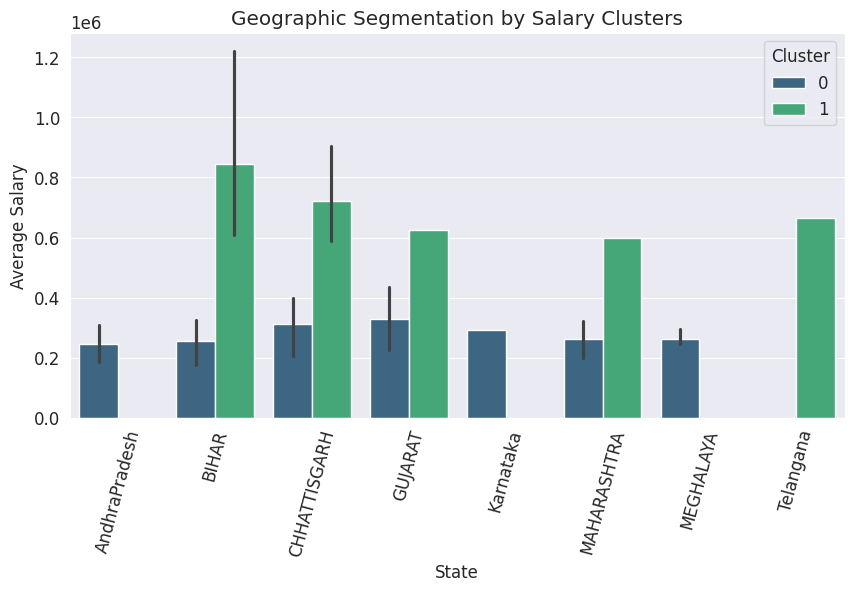

In [ ]:


# Plot the clustered regions
sns.barplot(x='State', y='Salary', hue='cluster', data=geographic_df, palette='viridis')
plt.title('Geographic Segmentation by Salary Clusters')
plt.xlabel('State')
plt.ylabel('Average Salary')
plt.xticks(rotation=75)
plt.legend(title='Cluster')
plt.show()


This data is only for 8 Indian states and represents a small chunk of the population; it may not be representative of the entire Indian population. In the boxplot, we have performed geographic segmentation based on salary clusters. Two clusters have been formed: Cluster 0 segments the states based on low salary, and Cluster 1 segments the states with high salaries. Bihar is the state with individuals having high salaries, followed by Chhattisgarh, Gujarat, Telangana, and Maharashtra. People in Andhra Pradesh, Karnataka, and Meghalaya draw lower salaries.

Cluster 1 can become the potential target market according to the above segmentation.

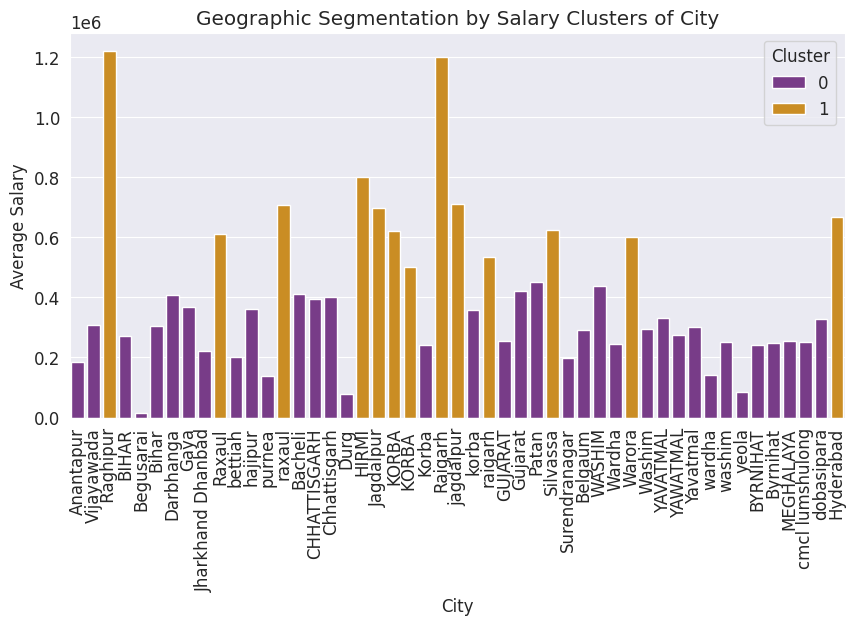

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot of Clusters
sns.barplot(x='City', y='Salary', hue='cluster', data=geographic_df, palette='CMRmap')
plt.title('Geographic Segmentation by Salary Clusters of City')
plt.xlabel('City')
plt.ylabel('Average Salary')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()


This box plot suggests that Raghipur, Raigharh, Hyderabad, and Warora could be the potential markets in the Cluster 1 segment, which has a high salary.